### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn import tree, ensemble, model_selection, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

### Import Datasets

In [2]:
df = pd.read_csv('combined_psf.csv')
df.drop(df.columns[0], axis = 1, inplace=True)
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,2020-02,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-09,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-06,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Strata Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2021-03,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,2020-03,1714.68927,1533.805597


### Preprocessing, Mapping and Train-Test Split

In [3]:
# Preprocessing
df['floor_range'] = df['floor_range'].str.replace('~', '')
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,2020-02,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-09,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-06,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Strata Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2021-03,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,2020-03,1714.68927,1533.805597


In [4]:
# Label encoding
df['street'] = df['street'].str.upper()
df['street'] = df['street'].astype('category')
street_dict = dict(zip(df['street'].cat.codes, df['street']))
df['street'] = df['street'].cat.codes

df['propertyType'] = df['propertyType'].astype('category')
property_dict = dict(zip(df['propertyType'].cat.codes, df['propertyType']))
df['propertyType'] = df['propertyType'].cat.codes

df['floor_range'] = df['floor_range'].astype('category')
floor_dict = dict(zip(df['floor_range'].cat.codes, df['floor_range']))
df['floor_range'] = df['floor_range'].cat.codes

# # Mapping
# import pickle
# street_mapping = pickle.load(open('street_mapping.pickle', 'rb'))
# floor_mapping = pickle.load(open('floor_mapping.pickle', 'rb'))
# property_mapping = pickle.load(open('property_mapping.pickle', 'rb'))

# df['street'] = df['street'].str.upper()
# df['street'] = df['street'].map(street_mapping)
# df['propertyType'] = df['propertyType'].map(property_mapping)
# df['floor_range'] = df['floor_range'].map(floor_mapping)

df.dtypes

district              int64
street                int16
propertyType           int8
remaining_lease     float64
school                int64
hawkercentre          int64
supermarkets          int64
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_range            int8
sentiment           float64
month                object
floor_area_sqft     float64
price_psf           float64
dtype: object

In [5]:
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,2016,11,999.0,27,6,8,0,-1.0,1.282130,103.786879,10,0.154684,2020-02,5643.51277,974.570312
1,5,2016,11,999.0,27,6,8,0,-1.0,1.282130,103.786879,10,0.122456,2018-09,3315.28120,1508.167693
2,5,2016,11,999.0,27,6,8,0,-1.0,1.282130,103.786879,10,0.122456,2018-06,3379.86460,1405.381742
3,5,1331,14,999.0,27,6,8,2,-1.0,1.292047,103.768591,10,0.139334,2021-03,2002.08540,939.020883
4,5,1331,15,999.0,27,6,8,2,-1.0,1.292047,103.768591,10,0.154684,2020-03,1714.68927,1533.805597


In [6]:
df.columns.tolist()

['district',
 'street',
 'propertyType',
 'remaining_lease',
 'school',
 'hawkercentre',
 'supermarkets',
 'Bus Stops Nearby',
 'crime_number',
 'latitude',
 'longitude',
 'floor_range',
 'sentiment',
 'month',
 'floor_area_sqft',
 'price_psf']

In [7]:
# Train-Test split
df['month']= pd.to_datetime(df['month'])
train_df = df[df.month < "2020-01-01"]
train_df = train_df.drop('month', axis=1)
test_df = df[df.month >= "2020-01-01"]
test_df = test_df.drop('month', axis=1)

X_train = train_df.loc[:, train_df.columns != 'price_psf']
y_train = train_df['price_psf']

X_test = test_df.loc[:, test_df.columns != 'price_psf']
y_test = test_df['price_psf']

# X_train, X_test, y_train, y_test = train_test_split(df.drop(['month','price_psf'], axis=1),
#                                                     df['price_psf'], 
#                                                     test_size=0.2,
#                                                     random_state=1)

In [8]:
X_test.columns

Index(['district', 'street', 'propertyType', 'remaining_lease', 'school',
       'hawkercentre', 'supermarkets', 'Bus Stops Nearby', 'crime_number',
       'latitude', 'longitude', 'floor_range', 'sentiment', 'floor_area_sqft'],
      dtype='object')

In [9]:
cols = X_train.columns.tolist()
cols

['district',
 'street',
 'propertyType',
 'remaining_lease',
 'school',
 'hawkercentre',
 'supermarkets',
 'Bus Stops Nearby',
 'crime_number',
 'latitude',
 'longitude',
 'floor_range',
 'sentiment',
 'floor_area_sqft']

In [10]:
# Fit and transform X training and testing
scaler = MinMaxScaler()
col = ['remaining_lease', 'school', 'hawkercentre', 'supermarkets',
      'Bus Stops Nearby', 'crime_number', 'floor_area_sqft']
x = X_train[col].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns = col, index = X_train.index)
X_train[col] = df_temp

x_test = X_test[col].values
x_test_scaled = scaler.transform(x_test)
df_temp = pd.DataFrame(x_test_scaled, columns = col, index = X_test.index)
X_test[col] = df_temp

# Fit and transform Y training and testing
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1)).reshape(1,-1)[0]
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).reshape(1,-1)[0]

print(y_train.shape)
print(y_test.shape)

(89135,)
(45954,)


/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
y_train = pd.DataFrame(y_train, columns = ['price_psf'])
y_test = pd.DataFrame(y_test, columns = ['price_psf'])
y_train

,price_psf
0,0.294011
1,0.273525
2,0.291005
3,0.290679
4,0.276082
...,...
89130,0.069056
89131,0.065082
89132,0.064895
89133,0.082495


In [12]:
X_test.columns.tolist()

['district',
 'street',
 'propertyType',
 'remaining_lease',
 'school',
 'hawkercentre',
 'supermarkets',
 'Bus Stops Nearby',
 'crime_number',
 'latitude',
 'longitude',
 'floor_range',
 'sentiment',
 'floor_area_sqft']

In [13]:
X_train.isnull().any()

district            False
street              False
propertyType        False
remaining_lease     False
school              False
hawkercentre        False
supermarkets        False
Bus Stops Nearby    False
crime_number        False
latitude            False
longitude           False
floor_range         False
sentiment           False
floor_area_sqft     False
dtype: bool

### Feature Cross: Latitude and Longitude

In [14]:
X_train = pd.DataFrame(X_train, columns = cols)
X_test = pd.DataFrame(X_test, columns = cols)

In [15]:
_, longitude_boundaries = np.histogram(X_train['longitude'])
_, latitude_boundaries = np.histogram(X_train['latitude'])

def assign_bucket(x, ranges):
    if x <= ranges[0]:
        return 0
    
    for i in range(1, len(ranges) - 1):
        if x <= ranges[i]:
            return i - 1
    return len(ranges) - 2

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']]) # fit and transform TRAIN
features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']]) # transform only TEST

In [17]:
features_to_drop = ['longitude', 'latitude', 'lgt_discrete', 'lat_discrete']
OHE_train = np.hstack((X_train.drop(features_to_drop, axis=1).values, features_lat_lgn_train.toarray()))
OHE_test = np.hstack((X_test.drop(features_to_drop, axis=1).values, features_lat_lgn_test.toarray()))

In [18]:
print(len(OHE_train),len(OHE_test))

89135 45954


### Summary of Results
*Goal: Low RMSE, Low MAE, R2 close to 1, High Adjusted R2, Low MAPE, Low SMAPE

Results:
1. Default Decision Tree 
    - training mse: 1.282207613212334e-05, testing mse: 0.0009812207152281106
    - training rmse: 0.003580792668128572, testing rmse: 0.03132444277601935
    - training mae: 0.0012034050542360515, testing mae: 0.01580475196491007
    - training R2: 0.9987095766435118, testing R2: 0.9103302102222963
    - training adjusted R2: 0.998709113202204, testing adjusted R2: 0.9102677239246789
    - training mape: 1.1857840879884094, testing mape: 9.846561078998278
    - training smape: 1.1806384754580064, testing smape: 9.945128476633935
2. Decision Tree with Randomized Search 
    - training mse: 0.00021032557908797807, testing mse: 0.0008674499845848237
    - training rmse: 0.014502605941277521, testing rmse: 0.02945250387632304
    - training mae: 0.006968929192083182, testing mae: 0.015019327115238778
    - training R2: 0.9788326760093037, testing R2: 0.9207272568207955
    - training adjusted R2: 0.978825073998488, testing adjusted R2: 0.9207151793994257
    - training mape: 5.002400130682143, testing mape: 9.07724790120886
    - training smape: 4.948974579276116, testing smape: 9.145576635786046
3. Default Random Forest 
    - training mse: 5.567820378389856e-05, testing mse: 0.0006188364878179652
    - training rmse: 0.007461782882388, testing rmse: 0.02487642433747192
    - training mae: 0.003523427033929071, testing mae: 0.012743326607732568
    - training R2: 0.9943965038212456, testing R2: 0.9434470380535035
    - training adjusted R2: 0.9943944913874313, testing adjusted R2: 0.9434076291821312
    - training mape: 2.7483021068136573, testing mape: 7.990053683196499
    - training smape: 2.7248197432739802, testing smape: 8.018639287853702
4. Random Forest with Randomized Search (Best Result)
    - training mse: 4.105603442140823e-05, testing mse: 0.0005728741979860348
    - training rmse: 0.00640749829663717, testing rmse: 0.023934790535662408
    - training mae: 0.003226589906313306, testing mae: 0.012146105714330235
    - training R2: 0.9958680899102262, testing R2: 0.9476473456937401
    - training adjusted R2: 0.9958666059803158, testing adjusted R2: 0.9476108638022787
    - training mape: 2.5575581236088487, testing mape: 7.654360998999921
    - training smape: 2.5412595325887435, testing smape: 7.687419387166359

### Define function for MAPE and sMAPE

In [19]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred.squeeze()-y_true.squeeze()) / (np.abs(y_true.squeeze()) + np.abs(y_pred.squeeze()))*100)

### Decision Tree

#### (a) Basic Decision Tree with Default Parameters

In [20]:
# train model
dt = tree.DecisionTreeRegressor()
dt.fit(OHE_train,y_train)

# make predictions on test set
y_pred_train = dt.predict(OHE_train)
y_pred = dt.predict(OHE_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-dt.score(OHE_train, y_train))*(len(y_train)-1)/(len(y_train)-OHE_train.shape[1]-1)
test_adj_r_squared = 1 - (1-dt.score(OHE_test, y_test))*(len(y_test)-1)/(len(y_test)-OHE_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
# sns.residplot(dt.predict(OHE_test).reshape(-1),y_test,lowess=True,
#                                   line_kws={'color': 'red', 'lw': 1, 'alpha': 1})

[0.07045336 0.17227482 0.30574436 ... 0.06153112 0.07166431 0.07234416]
training mse: 1.282207613212334e-05, testing mse: 0.0009812207152281106
training rmse: 0.003580792668128572, testing rmse: 0.03132444277601935
training mae: 0.0012034050542360515, testing mae: 0.01580475196491007
training R2: 0.9987095766435118, testing R2: 0.9103302102222963
training adjusted R2: 0.998709113202204, testing adjusted R2: 0.9102677239246789
training mape: 1.1857840879884094, testing mape: 9.846561078998278
training smape: 1.1806384754580064, testing smape: 9.945128476633935


Text(0.5, 1.0, 'Residual plot (for Training Data)')

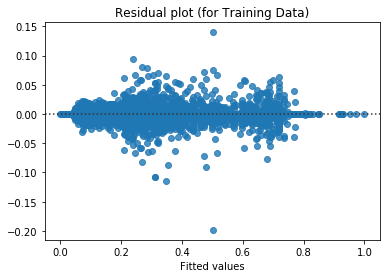

In [21]:
# Residual Plot for Training Data
sns.residplot(y_pred_train.reshape(-1), y_train, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot (for Training Data)')

Text(0.5, 1.0, 'Residual plot (for Testing Data)')

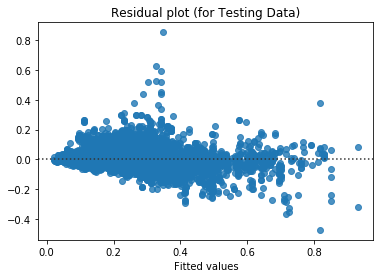

In [22]:
# Residual Plot for Testing Data
sns.residplot(y_pred.reshape(-1), y_test, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot (for Testing Data)')

#### (b) Decision Tree using Best Estimators from Randomized Search

In [23]:
params = {'min_samples_split': [7,12,15,20,25]}
rsearch_dt = RandomizedSearchCV(tree.DecisionTreeRegressor(random_state=1), 
                          params, 
                          scoring = 'r2',
                          verbose=1, 
                          cv=model_selection.KFold(5), 
                          n_jobs=-1)
rsearch_dt.fit(OHE_train, y_train)
print('best score:', rsearch_dt.best_score_)
print('best parameters: ', rsearch_dt.best_params_)
print('best estimators: ', rsearch_dt.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.5s finished


best score: 0.6233117878994751
best parameters:  {'min_samples_split': 25}
best estimators:  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=25, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')


In [24]:
# make predictions on test set
y_pred_train = rsearch_dt.predict(OHE_train)
y_pred = rsearch_dt.predict(OHE_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-rsearch_dt.score(OHE_train, y_train))*(len(y_train)-1)/(len(y_train)-OHE_train.shape[1]-1)
test_adj_r_squared = 1 - (1-rsearch_dt.score(OHE_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
# sns.residplot(rsearch_dt.predict(OHE_test).reshape(-1),y_test,lowess=True,
#                                   line_kws={'color': 'red', 'lw': 1, 'alpha': 1})

[0.14744982 0.15287506 0.29056821 ... 0.06255177 0.0759565  0.07231909]
training mse: 0.00021032557908797807, testing mse: 0.0008674499845848237
training rmse: 0.014502605941277521, testing rmse: 0.02945250387632304
training mae: 0.006968929192083182, testing mae: 0.015019327115238778
training R2: 0.9788326760093037, testing R2: 0.9207272568207955
training adjusted R2: 0.978825073998488, testing adjusted R2: 0.9207151793994257
training mape: 5.002400130682143, testing mape: 9.07724790120886
training smape: 4.948974579276116, testing smape: 9.145576635786046


Text(0.5, 1.0, 'Residual plot (for Training Data)')

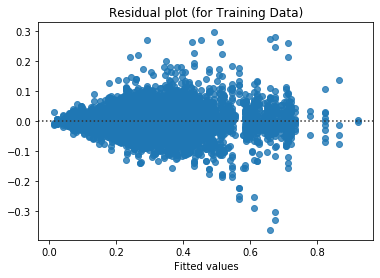

In [25]:
# Residual Plot for Training Data
sns.residplot(y_pred_train.reshape(-1), y_train, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot (for Training Data)')

Text(0.5, 1.0, 'Residual plot (for Testing Data)')

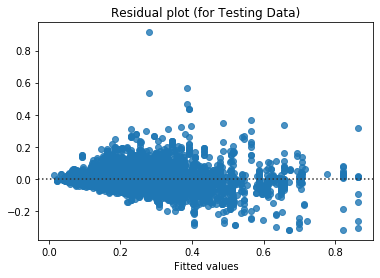

In [26]:
# Residual Plot for Testing Data
sns.residplot(y_pred.reshape(-1), y_test, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot (for Testing Data)')

### Random Forest

#### (a) Basic Random Forest with Default Parameters

In [27]:
# train model
rforest = ensemble.RandomForestRegressor()
rforest.fit(OHE_train,y_train)

# make predictions on test set
y_pred_train = rforest.predict(OHE_train)
y_pred = rforest.predict(OHE_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-rforest.score(OHE_train, y_train))*(len(y_train)-1)/(len(y_train)-OHE_train.shape[1]-1)
test_adj_r_squared = 1 - (1-rforest.score(OHE_test, y_test))*(len(y_test)-1)/(len(y_test)-OHE_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
# sns.residplot(rforest.predict(OHE_test).reshape(-1),y_test,lowess=True,
#                                   line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
# plt.xlabel("Fitted values")
# plt.title('Residual plot')

/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.21199307 0.17291317 0.29388233 ... 0.06083334 0.06863328 0.07095053]
training mse: 5.567820378389856e-05, testing mse: 0.0006188364878179652
training rmse: 0.007461782882388, testing rmse: 0.02487642433747192
training mae: 0.003523427033929071, testing mae: 0.012743326607732568
training R2: 0.9943965038212456, testing R2: 0.9434470380535035
training adjusted R2: 0.9943944913874313, testing adjusted R2: 0.9434076291821312
training mape: 2.7483021068136573, testing mape: 7.990053683196499
training smape: 2.7248197432739802, testing smape: 8.018639287853702


Text(0.5, 1.0, 'Residual plot (for Training Data)')

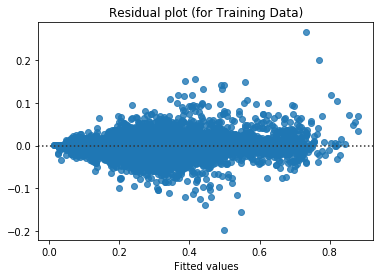

In [28]:
# Residual Plot for Training Data
sns.residplot(y_pred_train.reshape(-1), y_train, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot (for Training Data)')

Text(0.5, 1.0, 'Residual plot (for Testing Data)')

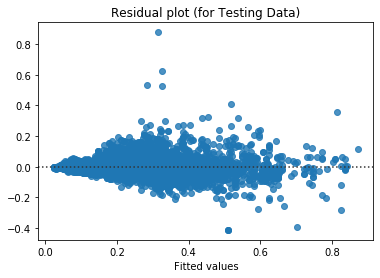

In [29]:
# Residual Plot for Testing Data
sns.residplot(y_pred.reshape(-1), y_test, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot (for Testing Data)')

In [30]:
rforest.get_params(deep=True)

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### (b) Random Forest using Best Estimators from Randomized Search

In [31]:
params = {'n_estimators': [100,150,200,250]}
random_search_cv = RandomizedSearchCV(ensemble.RandomForestRegressor(random_state=1), 
                              params, 
                              scoring = 'r2', 
                              verbose=1, 
                              cv=model_selection.KFold(5),
                              n_jobs = -1)
random_search_cv.fit(OHE_train, y_train)
print('best score:', random_search_cv.best_score_)
print('best parameters: ', random_search_cv.best_params_)
print('best estimators: ', random_search_cv.best_estimator_)

/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.6min finished
/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best score: 0.7133606432976479
best parameters:  {'n_estimators': 200}
best estimators:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


In [32]:
# make predictions on test set
y_pred_train = random_search_cv.predict(OHE_train)
y_pred = random_search_cv.predict(OHE_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-random_search_cv.score(OHE_train, y_train))*(len(y_train)-1)/(len(y_train)-OHE_train.shape[1]-1)
test_adj_r_squared = 1 - (1-random_search_cv.score(OHE_test, y_test))*(len(y_test)-1)/(len(y_test)-OHE_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
# sns.residplot(random_search_cv.predict(OHE_test).reshape(-1),y_test,lowess=True,
#                                   line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
# plt.xlabel("Fitted values")
# plt.title('Residual plot')

[0.17112529 0.18554548 0.30754048 ... 0.06152069 0.06918163 0.07111942]
training mse: 4.105603442140823e-05, testing mse: 0.0005728741979860348
training rmse: 0.00640749829663717, testing rmse: 0.023934790535662408
training mae: 0.003226589906313306, testing mae: 0.012146105714330235
training R2: 0.9958680899102262, testing R2: 0.9476473456937401
training adjusted R2: 0.9958666059803158, testing adjusted R2: 0.9476108638022787
training mape: 2.5575581236088487, testing mape: 7.654360998999921
training smape: 2.5412595325887435, testing smape: 7.687419387166359


Text(0.5, 1.0, 'Residual plot (for Training Data)')

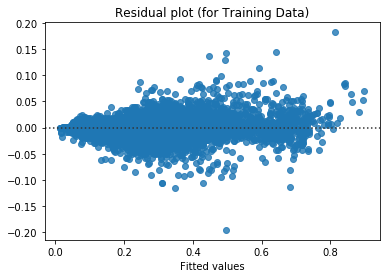

In [33]:
# Residual Plot for Training Data
sns.residplot(y_pred_train.reshape(-1), y_train, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot (for Training Data)')

Text(0.5, 1.0, 'Residual plot (for Testing Data)')

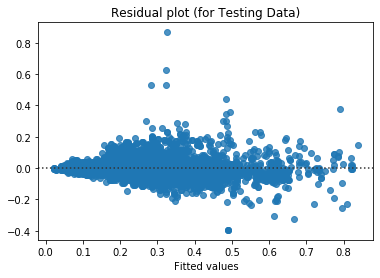

In [34]:
# Residual Plot for Testing Data
sns.residplot(y_pred.reshape(-1), y_test, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot (for Testing Data)')

In [35]:
random_search_cv.get_params(deep=True)

{'cv': KFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': 'raise-deprecating',
 'estimator__bootstrap': True,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 'warn',
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimator